Covid Data Final Project

The goal of this project is to find and analyze data from the COVID-19 pandemic. Much of the information that was talked about during the pandemic was mostly just the number of cases and deaths. These two numbers alone should lend themselves to just highlighting areas that have the most people and don't show the effects on smaller counties who might be dispropotionatly suffering. The goal of this analysis is to see which parts of the country suffered the most, if there is a connection between population and infection rate, and if infection rate and death rate are related.

GitHub Repository: https://github.com/RyanMarquart/COVID_Analysis

In [278]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The first step is to import and merge the datasets. The first data set is the live COVID infection and death rates from the New York Times. This dataset is the cumulative number of infections and deaths across the entire pandemic. The second dataset is the population estimates for each county from the US 2020 census.


In [279]:
#Tracked covid data that came from the New York Times
Covid_raw = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv")
last_updated = Covid_raw["date"][0]

#Removing some of the columns that won't contribute to the analysis
#The confirmed and probable numbers are already rolled into the cases and deaths numbers
Covid = Covid_raw.drop(labels = ["date", "fips", "confirmed_cases", "confirmed_deaths", 
                                 "probable_cases", "probable_deaths"], axis = 1)
Covid.head()

#Populations of each counties from the 2020 US Census
Population = pd.read_csv("https://raw.githubusercontent.com/RyanMarquart/COVID_Analysis/main/PopulationData.csv")
Population.head()

data = pd.merge(Covid, Population, on = ["state", "county"])
data.head()

,county,state,cases,deaths,region,population
0,Autauga,Alabama,15840,216.0,South,56145
1,Baldwin,Alabama,55730,680.0,South,229287
2,Barbour,Alabama,5672,98.0,South,24589
3,Bibb,Alabama,6444,104.0,South,22136
4,Blount,Alabama,14985,243.0,South,57879


In [280]:
print("The COVID-19 data was last updated " + last_updated)

The COVID-19 data was last updated 2022-05-08


Next we should look at the top ten counties with the highest number of cases, deaths, and population to see if there are any trends.

In [281]:
#Top ten counties by cases
data = data.sort_values(by = ["cases"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population
198,Los Angeles,California,2889112,31991.0,West,9943046
97,Maricopa,Arizona,1279872,17305.0,West,4579081
356,Miami-Dade,Florida,1209302,10917.0,South,2707303
604,Cook,Illinois,1175544,14918.0,Midwest,5108284
2548,Harris,Texas,1028969,10963.0,South,4738253
216,San Diego,California,818999,5244.0,West,3332427
212,Riverside,California,624595,6525.0,West,2489188
319,Broward,Florida,614436,5841.0,South,1958105
209,Orange,California,597100,7011.0,West,3166857
215,San Bernardino,California,595566,7306.0,West,2189183


In [282]:
#Top ten counties by deaths
data = data.sort_values(by = ["deaths"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population
198,Los Angeles,California,2889112,31991.0,West,9943046
97,Maricopa,Arizona,1279872,17305.0,West,4579081
604,Cook,Illinois,1175544,14918.0,Midwest,5108284
2548,Harris,Texas,1028969,10963.0,South,4738253
356,Miami-Dade,Florida,1209302,10917.0,South,2707303
1679,Clark,Nevada,541302,8445.0,West,2315963
1242,Wayne,Michigan,410946,7955.0,Midwest,1740623
215,San Bernardino,California,595566,7306.0,West,2189183
209,Orange,California,597100,7011.0,West,3166857
2504,Dallas,Texas,572686,6767.0,South,2635888


In [283]:
#Top ten counties by population
data = data.sort_values(by = ["population"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population
198,Los Angeles,California,2889112,31991.0,West,9943046
604,Cook,Illinois,1175544,14918.0,Midwest,5108284
2548,Harris,Texas,1028969,10963.0,South,4738253
97,Maricopa,Arizona,1279872,17305.0,West,4579081
216,San Diego,California,818999,5244.0,West,3332427
209,Orange,California,597100,7011.0,West,3166857
356,Miami-Dade,Florida,1209302,10917.0,South,2707303
2504,Dallas,Texas,572686,6767.0,South,2635888
212,Riverside,California,624595,6525.0,West,2489188
1679,Clark,Nevada,541302,8445.0,West,2315963


Looking at the three chunks of data we can see that Los Angeles County, CA is first for all three categories and Cook County, IL is in the top 4 for each category aswell. California also had 5 of the counties with the most infections, as well as 3 of the counties with the most deaths, along with 4 of the most populous counties giving it a strong presence in all categories.

To get better context of how counties did relative to their population lets add infection rate (percent of population infected), death rate (percent of infected who died), and population hit (percent of population killed by COVID) columns to the dataframe.

In [284]:
#creating and adding the infection rate column
infection_rate = data["cases"] / data["population"]
data["infection_rate"] = infection_rate

#creating and adding the death rate column
death_rate = data["deaths"] / data["cases"]
data["death_rate"] = death_rate

#creating and adding the population hit column
pop_hit = data["deaths"] / data["population"]
data["pop_hit"] = pop_hit

data.head()

,county,state,cases,deaths,region,population,infection_rate,death_rate,pop_hit
198,Los Angeles,California,2889112,31991.0,West,9943046,0.290566,0.011073,0.003217
604,Cook,Illinois,1175544,14918.0,Midwest,5108284,0.230125,0.012690,0.002920
2548,Harris,Texas,1028969,10963.0,South,4738253,0.217162,0.010654,0.002314
97,Maricopa,Arizona,1279872,17305.0,West,4579081,0.279504,0.013521,0.003779
216,San Diego,California,818999,5244.0,West,3332427,0.245767,0.006403,0.001574


Now lets look at the top ten counties for each of the three new categories and see if they give similar results to our first three data chunks or if they are completely different.

In [285]:
#Top ten counties by infection rate
data = data.sort_values(by = ["infection_rate"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population,infection_rate,death_rate,pop_hit
2598,Loving,Texas,194,1.0,South,181,1.071823,0.005155,0.005525
406,Chattahoochee,Georgia,7484,22.0,South,10551,0.709317,0.002940,0.002085
80,Nome Census Area,Alaska,6235,5.0,West,9909,0.629226,0.000802,0.000505
82,Northwest Arctic Borough,Alaska,4805,13.0,West,7644,0.628598,0.002706,0.001701
251,Crowley,Colorado,3341,30.0,West,5696,0.586552,0.008979,0.005267
2511,Dimmit,Texas,5759,51.0,South,9925,0.580252,0.008856,0.005139
69,Bethel Census Area,Alaska,10295,41.0,West,18437,0.558388,0.003983,0.002224
2306,Dewey,South Dakota,3137,44.0,Midwest,5789,0.541890,0.014026,0.007601
2571,Jim Hogg,Texas,2641,22.0,South,5184,0.509452,0.008330,0.004244
78,Kusilvak Census Area,Alaska,4073,12.0,West,8328,0.489073,0.002946,0.001441


In [286]:
#Top ten counties by death rate
data = data.sort_values(by = ["death_rate"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population,infection_rate,death_rate,pop_hit
1691,Storey,Nevada,134,11.0,West,4207,0.031852,0.082090,0.002615
2649,Sabine,Texas,1248,89.0,South,10507,0.118778,0.071314,0.008471
450,Hancock,Georgia,1586,90.0,South,8494,0.186720,0.056747,0.010596
2609,McMullen,Texas,169,9.0,South,721,0.234397,0.053254,0.012483
2525,Foard,Texas,208,11.0,South,1135,0.183260,0.052885,0.009692
2585,Knox,Texas,492,25.0,South,3683,0.133587,0.050813,0.006788
519,Towns,Georgia,2398,116.0,South,12247,0.195803,0.048374,0.009472
2322,Jerauld,South Dakota,415,20.0,Midwest,1985,0.209068,0.048193,0.010076
1621,Grant,Nebraska,104,5.0,Midwest,630,0.165079,0.048077,0.007937
1736,Harding,New Mexico,85,4.0,West,638,0.133229,0.047059,0.006270


In [287]:
#Top ten counties by population hit
data = data.sort_values(by = ["pop_hit"], ascending = False)
data.head(10)

,county,state,cases,deaths,region,population,infection_rate,death_rate,pop_hit
2609,McMullen,Texas,169,9.0,South,721,0.234397,0.053254,0.012483
2792,Galax city,Virginia,2556,78.0,South,6296,0.405972,0.030516,0.012389
2620,Motley,Texas,286,13.0,South,1185,0.241350,0.045455,0.010970
450,Hancock,Georgia,1586,90.0,South,8494,0.186720,0.056747,0.010596
2780,Emporia city,Virginia,1185,55.0,South,5257,0.225414,0.046414,0.010462
2322,Jerauld,South Dakota,415,20.0,Midwest,1985,0.209068,0.048193,0.010076
2822,Martinsville city,Virginia,3457,124.0,South,12355,0.279806,0.035869,0.010036
1087,Robertson,Kentucky,671,21.0,South,2136,0.314139,0.031297,0.009831
2525,Foard,Texas,208,11.0,South,1135,0.183260,0.052885,0.009692
2587,Lamb,Texas,4355,122.0,South,12710,0.342644,0.028014,0.009599


All three categories were dominated by Texas, having 3 in infection rate, 4 in death rate, and 4 in population hit. Overall the South is overwhelmingly represented having 6 counties in death rate and an astonishing 9 in population hit. Despite California being shown as having very high death and infection numbers in the first sets of data we looked at once divided by population the numbers are not nearly as bad as they initially seemed.

Looking at the first two data chunks in this section none of the top ten counties for infection rate were also in the top ten for death rate. This likely means that just because a larger amount of the population gets covid doesn't mean a larger percentage of those people will die than in other areas.

*Note*: The infection rate for Loving Country, TX was over 1. This is because this data is from cummulative across the whole pandemic meaning that in that county some residents were infected multiple times or non-residents were reported as having caught the virus while in the county, but don't actually live there.

To see if there is a possible relationship between population and infection rate I'll make two bar graphs from the data we've created and then compare them.

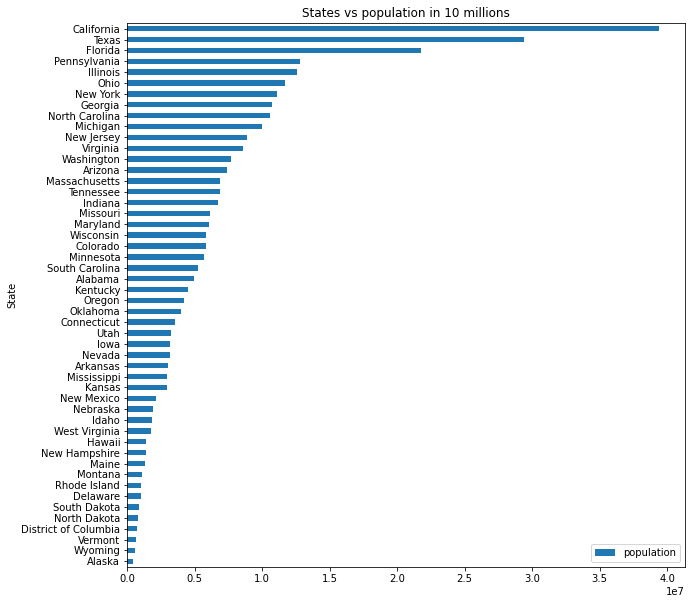

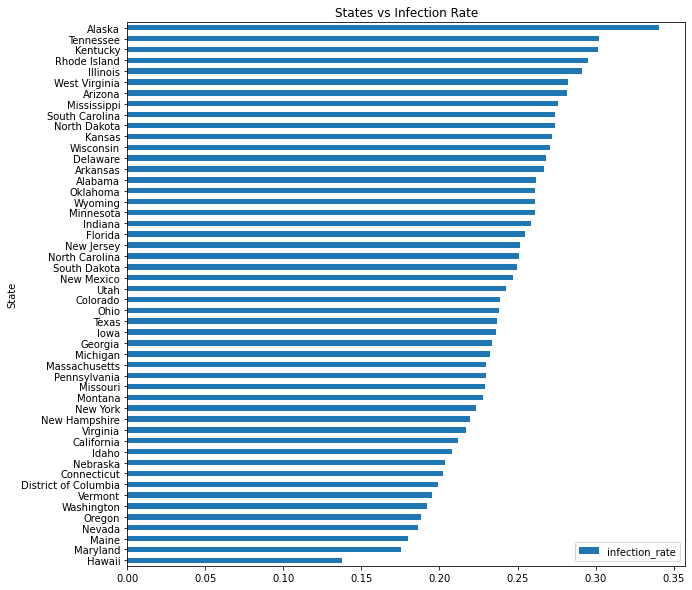

In [288]:
#makes a bar graph of state populations
state_populations = data.groupby("state")[["population"]].aggregate("sum")
state_populations = state_populations.sort_values(by = ["population"], ascending = True)
state_populations.plot.barh(figsize = (10,10),xlabel = "State", title = "States vs population in 10 millions");

#makes a bar graph of state population hit
state_infection_rate = data.groupby("state")[["infection_rate"]].aggregate("mean")
state_infection_rate = state_infection_rate.sort_values(by = ["infection_rate"], ascending = True)
state_infection_rate.plot.barh(figsize = (10,10),xlabel = "State", title = "States vs Infection Rate");

Looking at the two graphs there seems to be absolutely no connection between infection rate and population. Alaska which is shown having the smallest population had the highest infection rate in the nation. Initially I thought that having a higher population would mean there were more people to spread the virus to eachother and would then lead to a higher infection rate. This is clearly not the case.

Next I want to see which ten states had the largest amounts of deaths relative to their population and inversely which states had the least and then compare that to the different regions.

In [289]:
#States with the ten greatest population hits
state_hit = data.groupby("state")[["pop_hit"]].aggregate("mean").sort_values(by = ["pop_hit"], ascending = False)
state_hit.head(10)

,pop_hit
state,
Arizona,0.005278
Mississippi,0.004942
Georgia,0.004892
Tennessee,0.004766
Alabama,0.004712
Texas,0.004682
Arkansas,0.004542
South Dakota,0.004381
New Mexico,0.004263


In [290]:
#States with the ten lowest population hits
state_hit.sort_values(by = ["pop_hit"], ascending = True).head(10)

,pop_hit
state,
Hawaii,0.000653
Vermont,0.000952
Alaska,0.001201
Utah,0.001686
Maine,0.001745
New Hampshire,0.001851
District of Columbia,0.001880
California,0.001936
Washington,0.002087


In [291]:
#order of population hits by region
region_hit = data.groupby("region")[["pop_hit"]].aggregate("mean").sort_values(by = ["pop_hit"], ascending = False)
region_hit

,pop_hit
region,
South,0.004287
Midwest,0.003597
Northeast,0.002876
West,0.002812


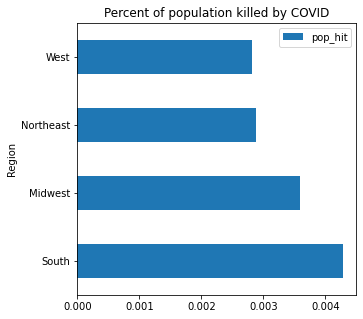

In [292]:
region_hit.plot.barh(figsize = (5,5),xlabel = "Region", title = "Percent of population killed by COVID");

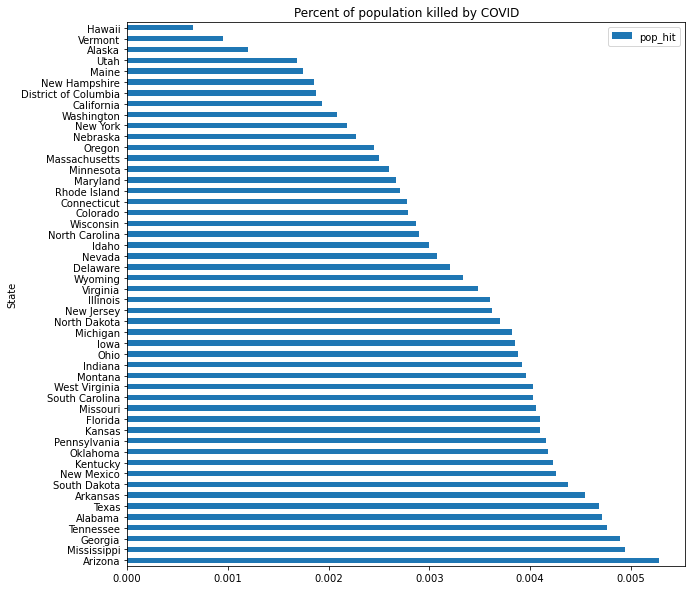

In [293]:
state_hit.plot.barh(figsize = (10,10),xlabel = "State", title = "Percent of population killed by COVID");

Almost all of the states who took the greatest population hits are from the South, while those less affected mostly consist of western and northeastern states. One big exception to this is Arizona which is the state that was hit the absolute hardest. This can likely because many retierees move to Arizona and they were more likely to be killed by COVID-19 due to their older age. 

Overall this data has pointed to the South being the area hit hardest by COVID-19 in terms of deaths in relation to the population. While much of the media portrayed COVID-19 hitting places like New York or California the hardest, it seems more rural areas were more likely to suffer, probably due to their being less infrastructure and access to advanced health care.

While there are pretty clear signs for how some parts of the country faired better or worse than others, this analysis only accounts for infections and lives lost. There are other factors that the COVID-19 crisis affected such as the economy and mental health, but this data doesn't account for that.